In [1]:
import sys

In [2]:
sys.path

['',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages/setuptools-15.2-py2.7.egg',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages/setuptools-15.2-py2.7.egg',
 '/home/jbourbeau/.local/lib/python2.7/site-packages',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/i3ports/root-v5.34.18/lib',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/i3ports/lib/python2.7/site-packages',
 '/data/user/jbourbeau/metaprojects/icerec/V05-00-00/build/lib',
 '/home/jbourbeau/cr-composition/analysis',
 '/home/jbourbeau',
 '/home/jbourbeau/useful',
 '/home/jbourbeau/anisotropy',
 '/home/jbourbeau/ShowerLLH_scripts',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python27.zip',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/pyth

In [3]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import radviz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn.apionly as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve, GridSearchCV, cross_val_score, ParameterGrid
from sklearn.neighbors import KNeighborsClassifier

import composition as comp
from preprocessing import get_train_test_sets
from features import get_training_features
from pipelines import get_pipeline
import plotting_functions as plotting
import data_functions as data_functions

%matplotlib inline

ImportError: No module named composition

In [2]:
sns.set_palette('muted')
sns.set_color_codes()

In [3]:
df, cut_dict = load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
standard_cut_keys = ['reco_exists', 'reco_zenith', 'num_hits', 'IT_signal',
                     'StationDensity', 'max_charge_frac', 'reco_containment',
                     'energy_range']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

df = df[selection_mask]

feature_list, feature_labels = get_training_features()
print(feature_list)
X_train, X_test, y_train, y_test, le = get_train_test_sets(
    df, feature_list)

print('number training events = ' + str(y_train.shape[0]))

load_sim.py:70: RuntimeWarning: divide by zero encountered in log10
  df['reco_log_energy'] = np.nan_to_num(np.log10(df['reco_energy']))
load_sim.py:76: RuntimeWarning: divide by zero encountered in log10
  df['log_NChannels'] = np.log10(df['NChannels'])


['reco_log_energy', 'InIce_log_charge_half', 'reco_cos_zenith', 'lap_chi2', 'NChannels_half']
number training events = 36125


In [25]:
radviz?

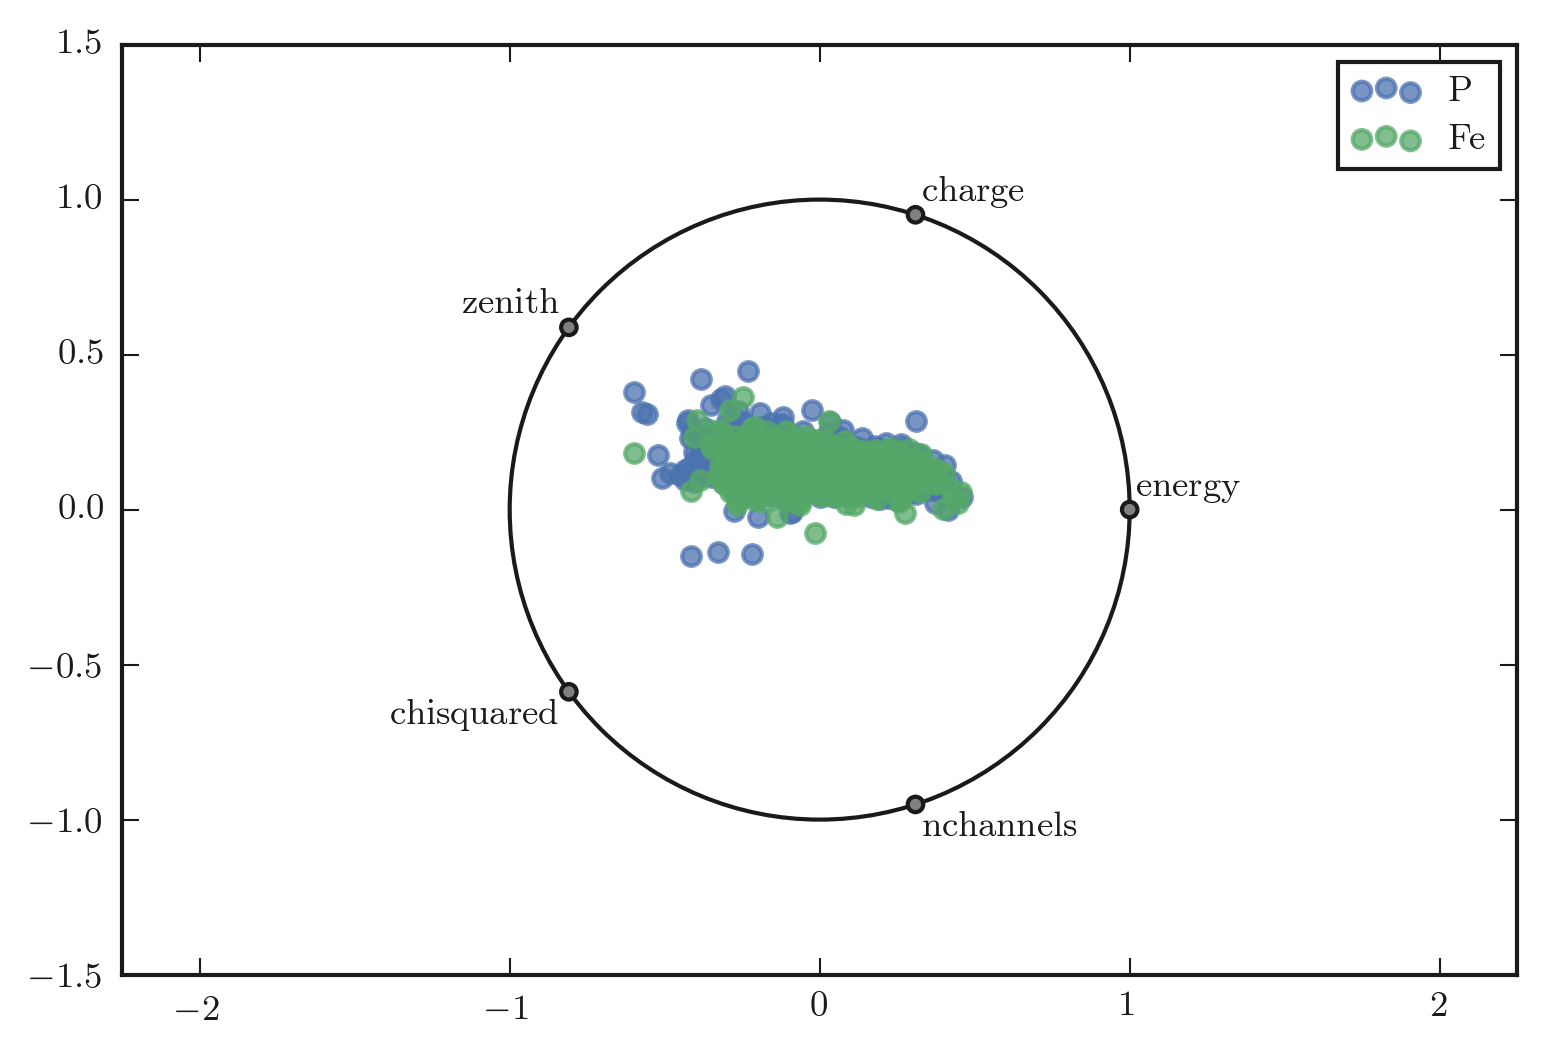

In [4]:
plt.figure()
feature_list = ['reco_log_energy', 'InIce_log_charge', 'reco_cos_zenith', 'lap_chi2', 'log_NChannels']
tmp = df[feature_list+['MC_comp']]
tmp.columns = ['energy', 'charge', 'zenith', 'chisquared', 'nchannels', 'comp']
opts = {'alpha': 0.75}
radviz(tmp.sample(3000), 'comp', color=['b', 'g'], **opts)

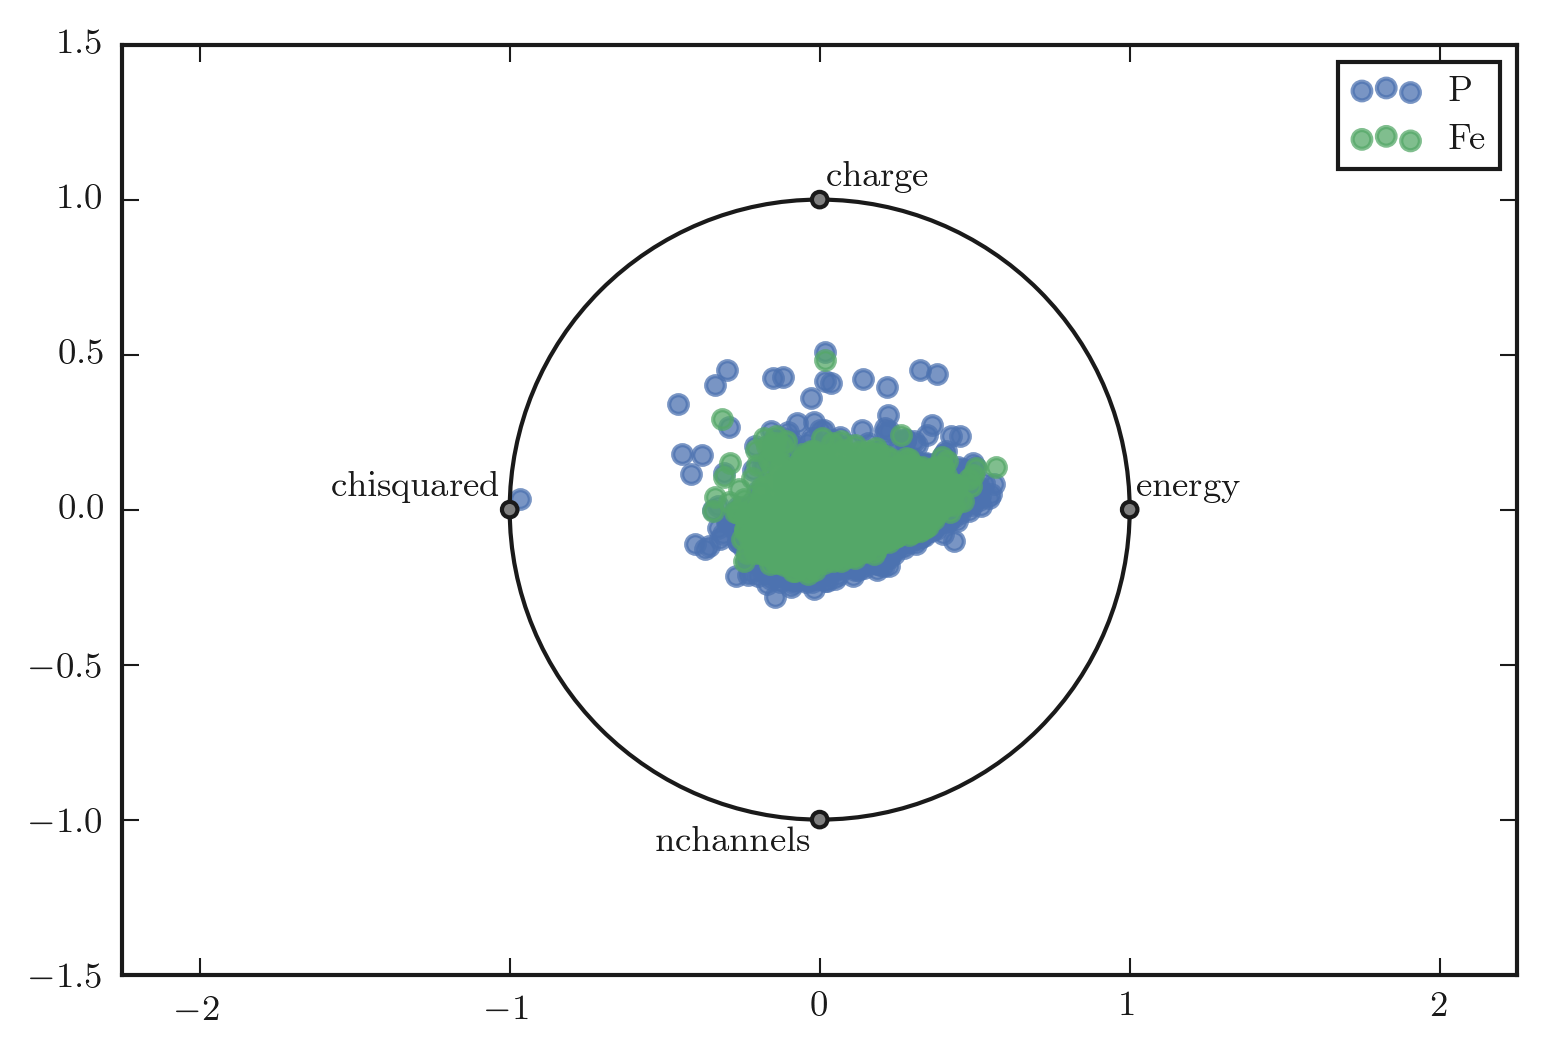

In [8]:
plt.figure()
feature_list = ['reco_log_energy', 'InIce_log_charge', 'lap_chi2', 'log_NChannels']
tmp = df[feature_list+['MC_comp']]
tmp.columns = ['energy', 'charge', 'chisquared', 'nchannels', 'comp']
opts = {'alpha': 0.75}
radviz(tmp.sample(10000), 'comp', color=['b', 'g'], **opts)

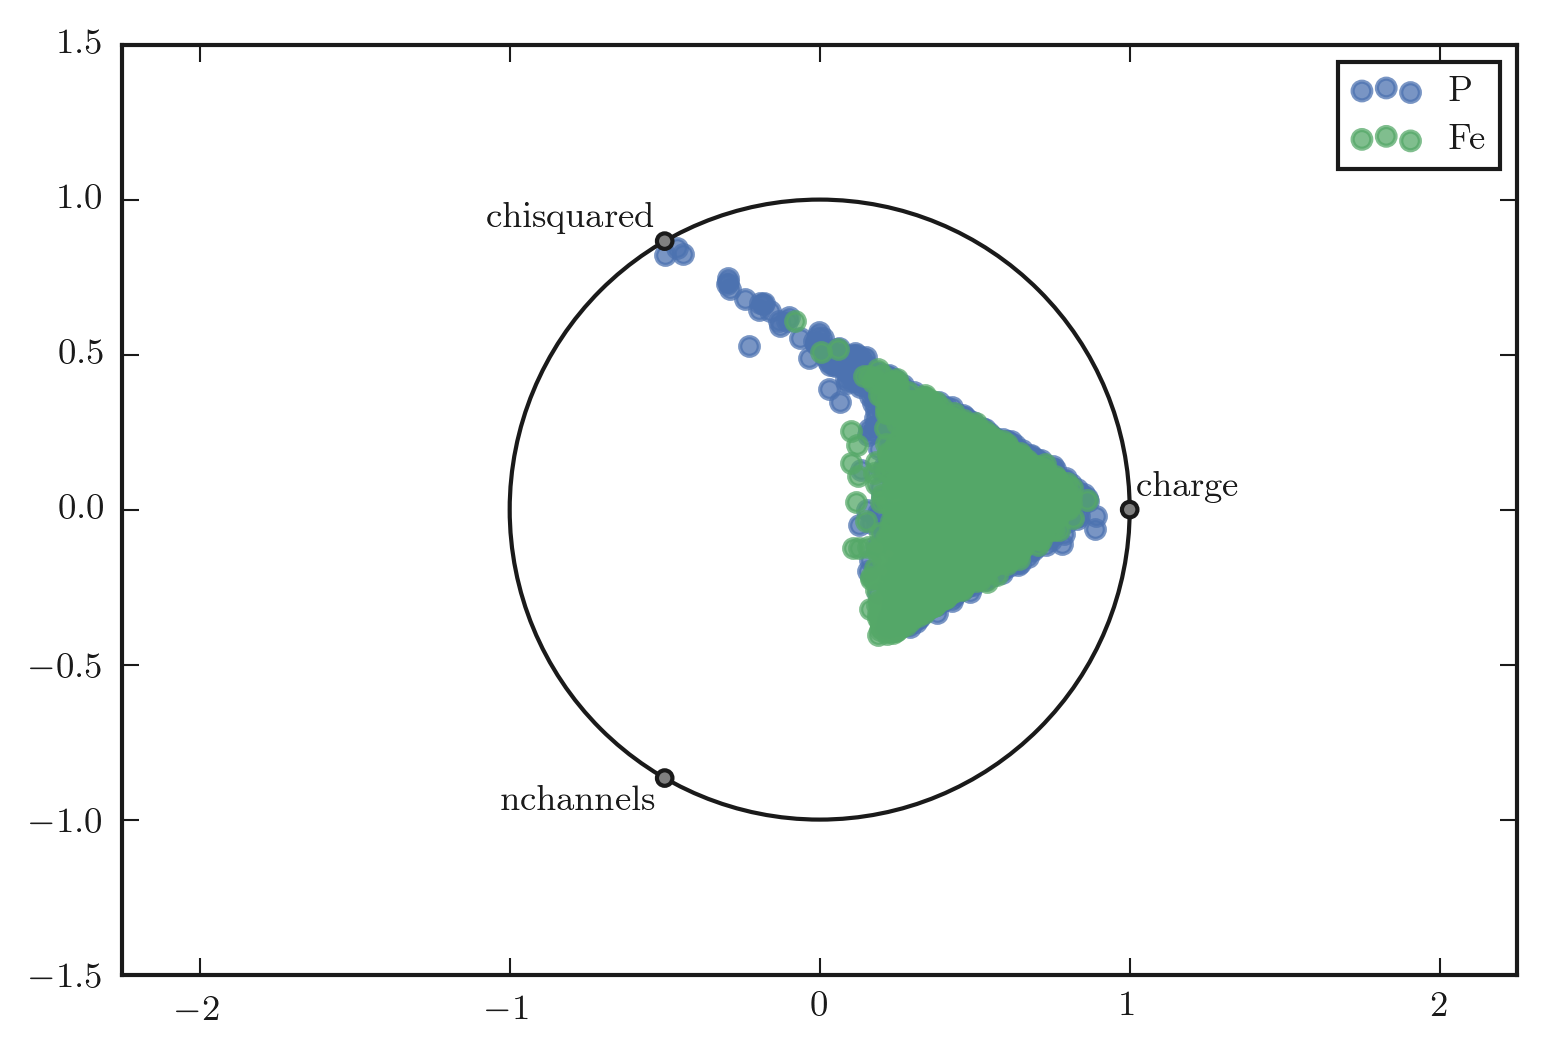

In [29]:
plt.figure()
feature_list = ['InIce_log_charge', 'lap_chi2', 'NChannels']
tmp = df[feature_list+['MC_comp']]
tmp.columns = ['charge', 'chisquared', 'nchannels','comp']
opts = {'alpha': 0.75}
radviz(tmp, 'comp', color=['b', 'g'], **opts)

In [21]:
tmp = df[feature_list+['MC_comp']][:10000]
tmp.columns = ['energy', 'charge', 'zenith', 'chisquared', 'nchannels', 'comp']
tmp

,energy,charge,zenith,chisquared,nchannels,comp
1,7.725,3.051990,0.964200,0.561476,109,P
9,7.675,3.295126,0.962817,0.384772,176,P
19,7.525,3.579235,0.928059,0.518567,103,P
27,7.575,3.681950,0.928684,0.517789,185,P
49,6.975,2.839009,0.917719,0.615560,99,P
73,6.375,2.062633,0.945604,0.451978,47,P
75,6.425,2.406748,0.947448,0.498216,72,P
77,6.275,2.059584,0.944470,0.557761,68,P
78,6.325,2.519856,0.946402,0.300512,69,P
81,6.275,2.757371,0.945170,1.078451,83,P


In [15]:
small.columns = ['energy', 'charge', 'zenith', 'chisquared', 'nchannels', 'comp']

In [16]:
small

,energy,charge,zenith,chisquared,nchannels,comp
1,7.725,3.051990,0.964200,0.561476,109,P
9,7.675,3.295126,0.962817,0.384772,176,P
19,7.525,3.579235,0.928059,0.518567,103,P
27,7.575,3.681950,0.928684,0.517789,185,P
49,6.975,2.839009,0.917719,0.615560,99,P
73,6.375,2.062633,0.945604,0.451978,47,P
75,6.425,2.406748,0.947448,0.498216,72,P
77,6.275,2.059584,0.944470,0.557761,68,P
78,6.325,2.519856,0.946402,0.300512,69,P
81,6.275,2.757371,0.945170,1.078451,83,P
